In [1]:
# Standard Module Imports
import os
import argparse
import re

In [2]:
# Importing module to load flatfiles into Python
mtrx2flat_dir = '/Users/sulaymandesai/Documents/GitHub/STM_file_management'
os.chdir(mtrx2flat_dir)
from flatfile_3 import FlatFile

In [3]:
default_dir = '/Users/sulaymandesai/Documents/Year_4/MSciProject/Load data'
os.chdir(default_dir)

In [4]:
# Importing SPM image viewer module
import spiepy

In [5]:
# Assigning path of flat file to variable
file_flat = '/Users/sulaymandesai/Documents/Year_4/MSciProject/Load data/STM/default_2017Jun09-162147_STM-STM_Spectroscopy--11_1.Z_flat'

In [6]:
# Applying flatfile function to file
load = FlatFile(file_flat)

In [7]:
# Extracting data from flat file
d = load.getData()

In [8]:
# Displaying first image data. Index runs from 0 - 3 as seen above.
d[0].data

array([[-6.14081725e-08, -6.14093451e-08, -6.14120914e-08, ...,
        -6.15736584e-08, -6.15741327e-08, -6.15727274e-08],
       [-6.13973821e-08, -6.13988643e-08, -6.14024531e-08, ...,
        -6.15661863e-08, -6.15645394e-08, -6.15621175e-08],
       [-6.13924376e-08, -6.13932697e-08, -6.13953308e-08, ...,
        -6.15516976e-08, -6.15500493e-08, -6.15486356e-08],
       ...,
       [-5.88441792e-08, -5.88426127e-08, -5.88415518e-08, ...,
        -5.90039457e-08, -5.90050842e-08, -5.90068147e-08],
       [-5.88351160e-08, -5.88355834e-08, -5.88358618e-08, ...,
        -5.90041964e-08, -5.90049094e-08, -5.90074168e-08],
       [-5.88277612e-08, -5.88279069e-08, -5.88300175e-08, ...,
        -5.90015974e-08, -5.90033397e-08, -5.90059388e-08]])

In [9]:
# Displaying metadata of first image
d[0].info

{'filename': '/Users/sulaymandesai/Documents/Year_4/MSciProject/Load data/STM/default_2017Jun09-162147_STM-STM_Spectroscopy--11_1.Z_flat',
 'comment': 'Sample=Si(001);CreationComment=',
 'unit': 'm',
 'date': '2017-06-09 17:12:33',
 'runcycle': 'Run 11 – cycle 1\n',
 'current': 5e-11,
 'vgap': -1.4000000000000001,
 'offset': [],
 'type': 'topo',
 'xres': 350,
 'yres': 350,
 'xinc': 0.08595988538681922,
 'yinc': 0.08595988538681922,
 'xreal': 30.085959885386725,
 'yreal': 30.085959885386725,
 'unitxy': 'nm',
 'direction': 'up-fwd'}

In [10]:
import matplotlib.pyplot as plt

In [11]:
array = d[0].data

In [12]:
array.shape

(350, 350)

In [13]:
import pycroscopy as px
import pyUSID as usid

/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pyUSID/viz/__init__.py:16: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  warn('Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. '


In [14]:
import numpy as np

array_reshaped = np.reshape(array, (350*350, 1))

In [15]:
print(array_reshaped)
print(array_reshaped.shape)

[[-6.14081725e-08]
 [-6.14093451e-08]
 [-6.14120914e-08]
 ...
 [-5.90015974e-08]
 [-5.90033397e-08]
 [-5.90059388e-08]]
(122500, 1)


In [16]:
d_metadata = d[0].info
d_metadata

{'filename': '/Users/sulaymandesai/Documents/Year_4/MSciProject/Load data/STM/default_2017Jun09-162147_STM-STM_Spectroscopy--11_1.Z_flat',
 'comment': 'Sample=Si(001);CreationComment=',
 'unit': 'm',
 'date': '2017-06-09 17:12:33',
 'runcycle': 'Run 11 – cycle 1\n',
 'current': 5e-11,
 'vgap': -1.4000000000000001,
 'offset': [],
 'type': 'topo',
 'xres': 350,
 'yres': 350,
 'xinc': 0.08595988538681922,
 'yinc': 0.08595988538681922,
 'xreal': 30.085959885386725,
 'yreal': 30.085959885386725,
 'unitxy': 'nm',
 'direction': 'up-fwd'}

In [17]:
# extracting values for length of x and y axis
xreal = d_metadata['xreal']
yreal = d_metadata['yreal']

In [18]:
xaxis = xreal/2
yaxis = yreal/2

In [22]:
# Extracting no. of rows and cols and calculating the position dimension length
num_rows = int(d_metadata['yres'])
num_cols = int(d_metadata['xres'])
num_pos = num_rows * num_cols

In [23]:
# Creating axis array of values which raw data is varied over
y_qty = 'Y'
y_units = 'nm'
y_vec = np.linspace(-yaxis, yaxis, num_rows, endpoint=True)

x_qty = 'X'
x_units = 'nm'
x_vec = np.linspace(-xaxis, xaxis, num_cols, endpoint=True)

In [26]:
main_data_name = 'STM'
main_qty = 'Z-height'
main_units = 'nm'

In [30]:
# First, let us separate the file name from the path to the folder containing the raw data file
folder_path, file_name = os.path.split(file_flat)

# Next, we will remove the ``.Z_flat`` extension
file_name = file_name[:-7] + '_Script'

# The new file name will share the same base name as the original file but will end with a ``.h5`` extension.
# This HDF5 or H5 file will live in the same folder as the raw data file
h5_path_1 = os.path.join(folder_path, file_name + '.h5')

In [33]:
# Expressing spectroscopic dimension
spec_dims = usid.Dimension(name = 'arb.', units = '', values = int(1))

In [34]:
# Expressing position dimension
pos_dims = [usid.Dimension(x_qty, x_units, x_vec),
            usid.Dimension(y_qty, y_units, y_vec)]

In [36]:
# Applying numpy translator
tran = usid.NumpyTranslator()
_ = tran.translate(h5_path_1, main_data_name,
                   array_reshaped, main_qty, main_units,
                   pos_dims, spec_dims,
                   parm_dict=d_metadata)

/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sidpy/sid/translator.py:42: FutureWarning: Consider using sidpy.Reader instead of sidpy.Translator if possible and contribute your reader to ScopeReaders
  warn('Consider using sidpy.Reader instead of sidpy.Translator if '
/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pyUSID/io/dtype_utils.py:62: FutureWarning: pyUSID.io.dtype_utils.contains_integers has been moved to sidpy.base.num_utils.contains_integers. This copy in pyUSID willbe removed in future release. Please update your import statements
  warn('pyUSID.io.dtype_utils.contains_integers has been moved to '
/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pyUSID/io/dtype_utils.py:309: FutureWarning: pyUSID.io.dtype_utils.validate_single_string_arg has been moved to sidpy.base.string_utils.validate_single_string_arg. This copy in pyUSID willbe removed in future release. Please update your import statements
  warn('

In [44]:
# Printing HDF5 file tree
h5_file = h5py.File(h5_path_1, mode='r')
usid.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values


In [45]:
print(h5_file['/Measurement_000/Channel_000/Position_Indices'])
print(h5_file['/Measurement_000/Channel_000/Position_Values'])
print(h5_file['/Measurement_000/Channel_000/Spectroscopic_Indices'])
print(h5_file['/Measurement_000/Channel_000/Spectroscopic_Values'])

<HDF5 dataset "Position_Indices": shape (122500, 2), type "<u4">
<HDF5 dataset "Position_Values": shape (122500, 2), type "<f4">
<HDF5 dataset "Spectroscopic_Indices": shape (1, 1), type "<u4">
<HDF5 dataset "Spectroscopic_Values": shape (1, 1), type "<f4">


In [46]:
print('\nMetadata or attributes in a datagroup')
for key in h5_file['/Measurement_000'].attrs:
    print('{} : {}'.format(key, h5_file['/Measurement_000'].attrs[key]))


Metadata or attributes in a datagroup
comment : Sample=Si(001);CreationComment=
current : 5e-11
date : 2017-06-09 17:12:33
direction : up-fwd
filename : /Users/sulaymandesai/Documents/Year_4/MSciProject/Load data/STM/default_2017Jun09-162147_STM-STM_Spectroscopy--11_1.Z_flat
machine_id : eduroam-int-dhcp-97-206-35.ucl.ac.uk
offset : []
platform : macOS-10.15.5-x86_64-i386-64bit
pyUSID_version : 0.0.9
runcycle : Run 11 – cycle 1

sidpy_version : 0.0.3
timestamp : 2020_12_01-13_55_55
type : topo
unit : m
unitxy : nm
vgap : -1.4000000000000001
xinc : 0.08595988538681922
xreal : 30.085959885386725
xres : 350
yinc : 0.08595988538681922
yreal : 30.085959885386725
yres : 350


In [47]:
usid.hdf_utils.print_tree(h5_file, main_dsets_only=True)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Raw_Data


<HDF5 dataset "Raw_Data": shape (122500, 1), type "<f8">
located at: 
	/Measurement_000/Channel_000/Raw_Data 
Data contains: 
	Z-height (nm) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 350 
	X - size: 350 
Spectroscopic Dimensions: 
	arb. - size: 1
Data Type:
	float64


/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pyUSID/io/dtype_utils.py:62: FutureWarning: pyUSID.io.dtype_utils.contains_integers has been moved to sidpy.base.num_utils.contains_integers. This copy in pyUSID willbe removed in future release. Please update your import statements
  warn('pyUSID.io.dtype_utils.contains_integers has been moved to '
/Users/sulaymandesai/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pyUSID/io/dtype_utils.py:38: FutureWarning: pyUSID.io.dtype_utils.lazy_load_array has been moved to sidpy.hdf.hdf_utils.lazy_load_array. This copy in pyUSID willbe removed in future release. Please update your import statements
  warn('pyUSID.io.dtype_utils.lazy_load_array has been moved to '


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11d905fa0>)

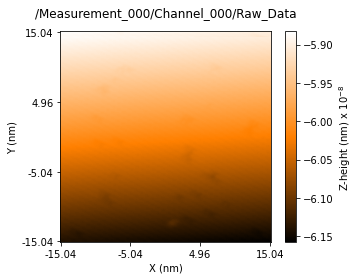

In [64]:
# Visualising the STM topography
h5_topo = usid.USIDataset(h5_file['/Measurement_000/Channel_000/Raw_Data'])
print(h5_topo)
h5_topo.visualize(cmap = spiepy.NANOMAP)